In [1]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2023-03-28 16:26:19--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2023-03-28 16:26:19 (34.7 MB/s) - ‘helper.py’ saved [2813/2813]



# **LAB 12 : ARTIFICIAL NEURAL NETWORKS**

*To build an ANN model for performing classification on a given dataset.*

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from helper import view_classify

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


# *KNOWING THYE DATAET BETTER !!*

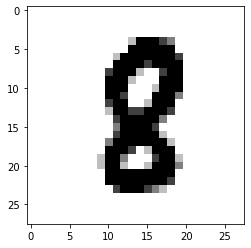

In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

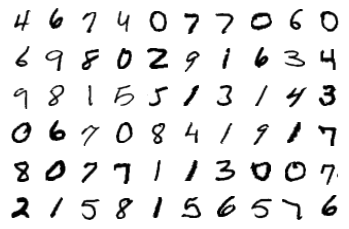

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# *BUILDING ARTIFICIAL NEURAL NETWORK*

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


# *ADJUSTING WEIGHTS*

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 4.8891e-04,  4.8891e-04,  4.8891e-04,  ...,  4.8891e-04,
          4.8891e-04,  4.8891e-04],
        [-8.2477e-05, -8.2477e-05, -8.2477e-05,  ..., -8.2477e-05,
         -8.2477e-05, -8.2477e-05],
        [-4.4115e-04, -4.4115e-04, -4.4115e-04,  ..., -4.4115e-04,
         -4.4115e-04, -4.4115e-04],
        ...,
        [ 7.7632e-04,  7.7632e-04,  7.7632e-04,  ...,  7.7632e-04,
          7.7632e-04,  7.7632e-04],
        [-3.4501e-03, -3.4501e-03, -3.4501e-03,  ..., -3.4501e-03,
         -3.4501e-03, -3.4501e-03],
        [ 1.3838e-04,  1.3838e-04,  1.3838e-04,  ...,  1.3838e-04,
          1.3838e-04,  1.3838e-04]])


# *Core Training Process*

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6759722699711064
Epoch 1 - Training loss: 0.28137336485485026
Epoch 2 - Training loss: 0.21824693582110058
Epoch 3 - Training loss: 0.17929935593928484
Epoch 4 - Training loss: 0.15254032803075845
Epoch 5 - Training loss: 0.13127819399760443
Epoch 6 - Training loss: 0.11623245548965262
Epoch 7 - Training loss: 0.10420882211688326
Epoch 8 - Training loss: 0.09315835162282371
Epoch 9 - Training loss: 0.08459802230955092
Epoch 10 - Training loss: 0.07795824666571087
Epoch 11 - Training loss: 0.07175688792083627
Epoch 12 - Training loss: 0.0662733059453923
Epoch 13 - Training loss: 0.06095192304724005
Epoch 14 - Training loss: 0.05759913838187507

Training Time (in minutes) = 3.7686816533406575


Predicted Digit = 0


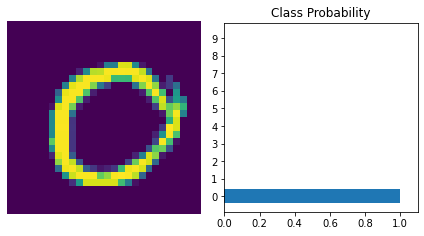

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9742


In [ ]:
torch.save(model, './my_mnist_model.pt') 